# Modelo de regresión lineal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)

In [3]:
# Residuos / errores
res = 0 + 0.8 * np.random.randn(100)

In [4]:
# Antes era 1.9 en lugar de 0.3
y_pred = 5 + 0.3 * x

In [5]:
y_act = 5 + 0.3 * x + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
data = pd.DataFrame(
    {
        "x": x_list,
        "y_actual": y_act_list,
        "y_prediccion": y_pred_list
    }
)

In [8]:
data.head()

,x,y_actual,y_prediccion
0,2.013719,5.981024,5.604116
1,-0.418311,4.614525,4.874507
2,2.091254,5.704754,5.627376
3,3.763493,6.650429,6.129048
4,2.128314,3.243497,5.638494


In [9]:
y_mean = [np.mean(y_act) for i in range (1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

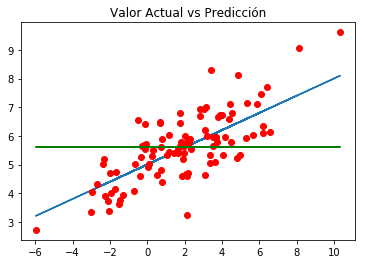

In [10]:
plt.plot(x,y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x, y_mean, "g")
plt.title("Valor Actual vs Predicción")

In [11]:
data["SSR"] = (data["y_prediccion"]-np.mean(y_act))**2
data["SSD"] = (data["y_prediccion"]-data["y_actual"])**2
data["SST"] = (data["y_actual"]-np.mean(y_act))**2

In [12]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,2.013719,5.981024,5.604116,0.000026,0.142060,0.138218
1,-0.418311,4.614525,4.874507,0.539844,0.067591,0.989473
2,2.091254,5.704754,5.627376,0.000329,0.005987,0.009122
3,3.763493,6.650429,6.129048,0.270193,0.271838,1.084060
4,2.128314,3.243497,5.638494,0.000855,5.736013,5.596777


## ¿Cómo saber si la prección fue buena?
* SST: Variabilidad de los datos respecto a su media.
* SSD: Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar.
* SSR: Diferencia entre la regresion y el valor medio.
* R2: Coeficiente de determinación.

In [13]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [14]:
# Estos son los puntos que no entran en el modelo.
SSD

63.14847584479013

In [15]:
# Exactitud
R2 = SSR / SST

In [16]:
# Con 1.9 el R2 era 0.9990333763...
R2

0.47394142826261293

(array([ 1.,  5.,  8., 17., 25., 19., 18.,  6.,  0.,  1.]),
 array([-2.27298444, -1.80618625, -1.33938805, -0.87258985, -0.40579166,
         0.06100654,  0.52780474,  0.99460293,  1.46140113,  1.92819933,
         2.39499752]),
 <a list of 10 Patch objects>)

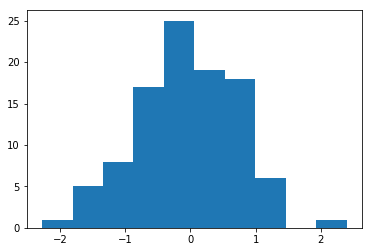

In [17]:
plt.hist(data["y_prediccion"] - data["y_actual"])

### Obtengo la recta de regresion:
* b = sum((xi - x_m)*(y_i - y_m))/sum((xi - x_m)^2)
* a = y_n - b * x_m

In [18]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])

In [19]:
data["beta_n"] = (data["x"] - x_mean)*(data["y_actual"])
data["beta_d"] = (data["x"] - x_mean)**2

In [20]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [21]:
alpha = y_mean - beta * x_mean

In [22]:
alpha, beta

(4.99873808696089, 0.32766262513268857)

In [23]:
data["y_model"] = alpha + beta * data["x"]

In [24]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,2.013719,5.981024,5.604116,0.000026,0.142060,0.138218,0.900109,0.022648,5.658559
1,-0.418311,4.614525,4.874507,0.539844,0.067591,0.989473,-10.528205,5.205407,4.861673
2,2.091254,5.704754,5.627376,0.000329,0.005987,0.009122,1.300846,0.051997,5.683964
3,3.763493,6.650429,6.129048,0.270193,0.271838,1.084060,12.637600,3.611020,6.231894
4,2.128314,3.243497,5.638494,0.000855,5.736013,5.596777,0.859814,0.070272,5.696107


In [25]:
SSR = sum((data["y_model"] - y_mean)**2)
SSD = sum((data["y_model"] - data["y_actual"])**2)
SST = sum((data["y_actual"] - y_mean)**2)

In [26]:
SSR, SSD, SST

(80.37745614887895, 62.322785457935225, 142.7002416068143)

In [27]:
# El R2 con 1.9 era de 0.96833444...
R2 = SSR / SST
R2

0.5632608273386464

Text(0.5, 1.0, 'Valor actual vs Predicción')

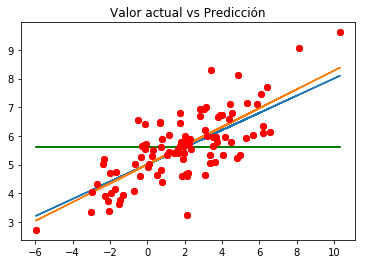

In [28]:
y_mean = [np.mean(y_act) for i in range (1, len(x_list) + 1)]
plt.plot(data["x"], data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"], y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.title("Valor actual vs Predicción")

### Error estándar de los residuos (RSE)

In [30]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.7974627203744976

In [31]:
np.mean(data["y_actual"])

5.609247325835773

In [32]:
RSE / np.mean(data["y_actual"])

0.14216929189437663